In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.abc import c,x,y,u,v,omega,rho,beta
from sympy import Matrix, im, re, symbols, sqrt, init_printing
init_printing()

C:\Users\admin\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\admin\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\admin\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will b

In [2]:
ep1,ep2=symbols("epsilon_1 epsilon_2")
e1=x*(1-x**2-y**2)-omega*y+ep1*u
e2=y*(1-x**2-y**2)+omega*x
e3=rho*v
e4=-rho*beta*u-c*v+ep2*x

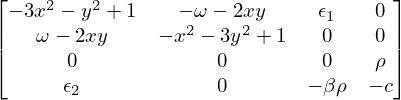

In [5]:
F

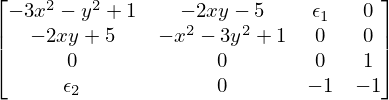

In [6]:
X = Matrix([e1,e2,e3,e4])
F=X.jacobian([x,y,u,v])
jack=F.subs([(beta,1),(rho,1),(c,1),(omega,5)])
jack

In [7]:
def check_stability(jack):
    k=0
    p=list(jack.eigenvals().keys())
    #print("**Real Part of Eigenvalues**")
    for i in p:
        #print(re(i.evalf()))
        if re(i.evalf())>=0:
            k=1
    #print("***************************")
    return k

In [20]:
def jack_eval(epsilon1):
    epsilon2=8
    stable=[]
    unstable=[]
    a=((epsilon1*epsilon2+50 +sqrt((epsilon1**2)*(epsilon2**2)-100))/(2*epsilon1*epsilon2))**0.5
    b=((epsilon1*epsilon2+50 -sqrt((epsilon1**2)*(epsilon2**2)-100))/(2*epsilon1*epsilon2))**0.5
    
    
    #first trivial fixed point
    x1=0
    y1=0
    u1=0

    #second fixed point
    x2=(5*a)/(-25+a*a*epsilon1*epsilon2)
    y2=a
    u2=(5*a*epsilon2)/(-25+a*a*epsilon1*epsilon2)

    #third fixed point
    x3=(-5*a)/(-25+a*a*epsilon1*epsilon2)
    y3=-a
    u3=(5*a*epsilon2)/(-25+a*a*epsilon1*epsilon2)

    #fourth fixed point
    x4=(5*b)/(-25+b*b*epsilon1*epsilon2)
    y4=b
    u4=(5*b*epsilon2)/(-25+b*b*epsilon1*epsilon2)

    #fifth fixed point
    x5=(-5*b)/(-25+b*b*epsilon1*epsilon2)
    y5=-b
    u5=(5*b*epsilon2)/(-25+b*b*epsilon1*epsilon2)
    if im(x2)==0:
        x1=float(x1)
        y1=float(y1)
        u1=float(u1)
        x2=float(x2)
        y2=float(y2)
        u2=float(u2)

        x3=float(x3)
        y3=float(y3)
        u3=float(u3)

        x4=float(x4)
        y4=float(y4)
        u4=float(u4)

        x5=float(x5)
        y5=float(y5)
        u5=float(u5)
    
        #print(x1,float(x2),float(x3),float(x4),float(x5))
        xi=[[x1,y1,u1],[x2,y2,u2],[x3,y3,u3],[x4,y4,u4],[x5,y5,u5]]
        #print("Set of Fixed Points: ",xi)
        i=1
        for point in xi:
            j=jack.subs([(x,point[0]),(y,point[1]),(u,point[2]),(ep2,epsilon2),(ep1,epsilon1)])
            #print(f"\nx({i}):")
            #print(point[0])
            if check_stability(j)==0:
                stable.append(point[0])
            else:
                unstable.append(point[0])

            i+=1
    else:
        j=jack.subs([(x,x1),(y,y1),(u,u1),(ep2,epsilon2),(ep1,epsilon1)])
        if check_stability(j)==0:
            stable.append(x1)
        else:
            unstable.append(x1)
    return [stable,unstable]


In [9]:
jack_eval(5)

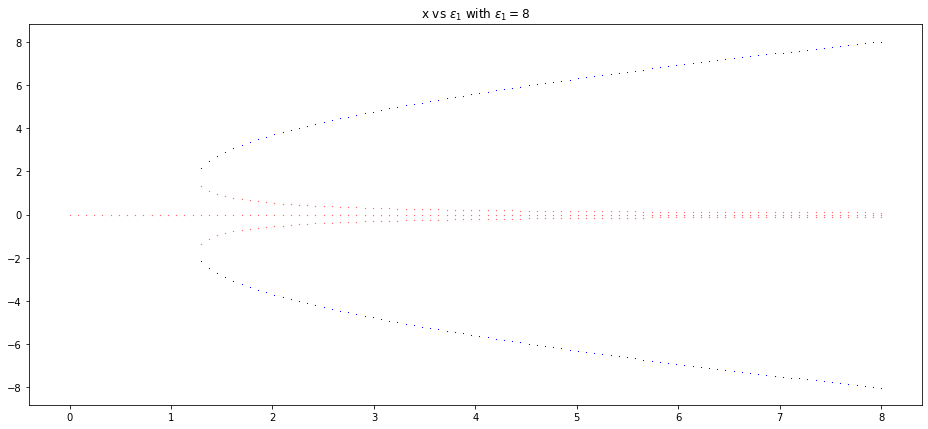

In [21]:
plt.figure(figsize=(16,7))
stable=[]
unstable=[]
for val in np.linspace(0,8,100):
    s_temp,u_temp=jack_eval(val)
    #s_temp=np.array(s_temp)
    #u_temp=np.array(u_temp)
    #print(s_temp,"\n ***",u_temp)
    stable.append(s_temp)
    unstable.append(u_temp)
    for point in u_temp:#plot unstable points
        plt.plot(val,point,'r.',markersize=0.5)#,label="Unstable Points")
        
    for point in s_temp:

        plt.plot(val,point,'b*',markersize=0.5)#,label="Stable Points")

#######################################################
plt.title("x vs $\epsilon_{1}$ with $\epsilon_{1}=8$")        
#plt.legend()
plt.show()

In [ ]:
#plt.savefig("phase.jpg",dpi=1000)

In [3]:
(e1,e2,e3,e4)

In [39]:
def compute(x0,y0,u0,v0,t0,pee=1,steps=1000,delta_t=0.01):
    # define equation
    def evaluate(X,Y,U,V,epsilon1=6,epsilon2=8,b=1,p=1,C=1,w=5):
        x_dot = e1.subs([(x,X),(y,Y),(u,U),(v,V),(beta,b),(rho,p),(c,C),(omega,w),(ep1,epsilon1),(ep2,epsilon2)])
        y_dot = e2.subs([(x,X),(y,Y),(u,U),(v,V),(beta,b),(rho,p),(c,C),(omega,w),(ep1,epsilon1),(ep2,epsilon2)])
        u_dot = e3.subs([(x,X),(y,Y),(u,U),(v,V),(beta,b),(rho,p),(c,C),(omega,w),(ep1,epsilon1),(ep2,epsilon2)])
        v_dot = e4.subs([(x,X),(y,Y),(u,U),(v,V),(beta,b),(rho,p),(c,C),(omega,w),(ep1,epsilon1),(ep2,epsilon2)])

        return x_dot.evalf(), y_dot.evalf(), u_dot.evalf(), v_dot.evalf()

        # basic parameters
    #delta_t = 0.01 
    #steps = 1000

    # initialize solutions arrays (+1 for initial conditions)
    xx = np.empty((steps + 1))
    yy = np.empty((steps + 1))
    uu = np.empty((steps + 1))
    vv = np.empty((steps + 1))
    tt = np.empty((steps+1))
    # fill in initial conditions
    xx[0], yy[0], uu[0], vv[0] = (x0,y0,u0,v0)
    tt[0] = t0
    # solve equation system

    for i in range(steps):
        # Calculate derivatives
        x_dot, y_dot, u_dot, v_dot = evaluate(xx[i], yy[i], uu[i], vv[i])

        tt[i+1] = tt[i] + delta_t

        xx[i + 1] = xx[i] + (x_dot * delta_t)
        yy[i + 1] = yy[i] + (y_dot * delta_t)
        uu[i + 1] = uu[i] + (u_dot * delta_t)
        vv[i + 1] = vv[i] + (v_dot * delta_t)
    return xx,yy,uu,vv,tt

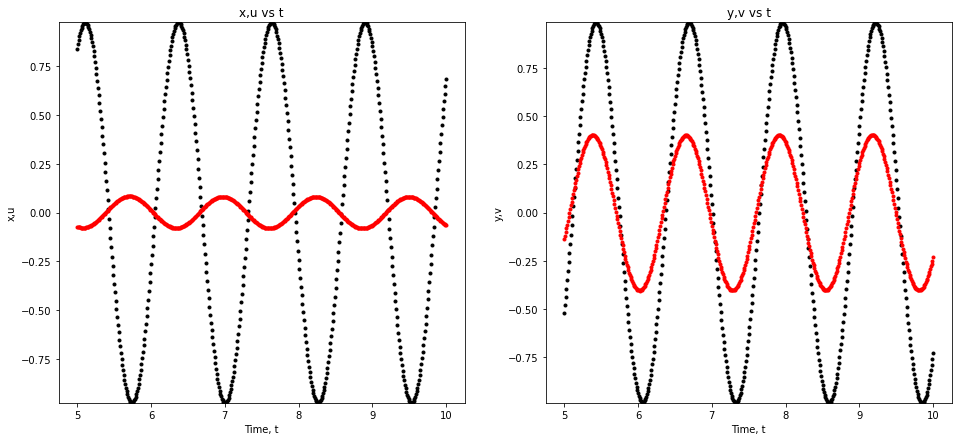

In [30]:
#plt.style.use('dark_background')
plt.figure(figsize=(16,7))

plt.subplot(1, 2, 1)
plt.title("x,u vs t")
#plt.xlim((min(tt),max(tt))) 
plt.ylim((min(xx),max(xx)))

plt.plot(tt[int(steps/2):], xx[int(steps/2):],'k.')
plt.plot(tt[int(steps/2):], uu[int(steps/2):],"r.") #,color='white',markersize=0.5)
plt.xlabel("Time, t")
plt.ylabel("x,u")

plt.subplot(1, 2, 2)
plt.title("y,v vs t")
#plt.xlim((min(tt),max(tt))) 
plt.ylim((min(yy),max(yy)))

plt.plot(tt[int(steps/2):], yy[int(steps/2):],'k.')
plt.plot(tt[int(steps/2):], vv[int(steps/2):],"r.") #,color='white',markersize=0.5)
plt.xlabel("Time, t")
plt.ylabel("y,v")
plt.show()

In [17]:
import pandas as pd
data=pd.DataFrame(np.transpose([tt,xx,yy,uu,vv]))

In [18]:
data

,0,1,2,3,4
0,0.00,0.100000,0.000000,0.100000,0.100000
1,0.01,0.104990,0.005000,0.101000,0.100000
2,0.01,0.109818,0.010299,0.102000,0.100090
3,0.01,0.114468,0.015892,0.103001,0.100265
4,0.01,0.118923,0.021772,0.104004,0.100522
...,...,...,...,...,...
996,0.01,-0.114867,-0.972612,-0.001013,-0.407450
997,0.01,-0.066324,-0.978752,-0.005087,-0.405663
998,0.01,-0.017615,-0.982437,-0.009144,-0.402882
999,0.01,0.031135,-0.983657,-0.013173,-0.399114


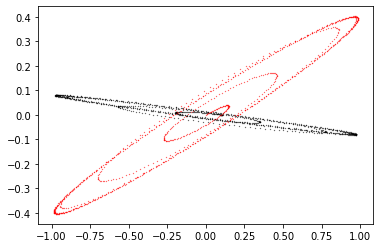

In [35]:
plt.plot(xx, uu,'k.',markersize=0.5)
plt.plot(yy, vv,"r.",markersize=0.5)

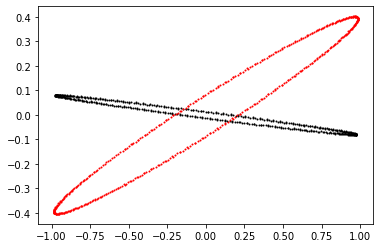

In [44]:
plt.plot(xx[int(steps/2):], uu[int(steps/2):],'k.',markersize=2)
plt.plot(yy[int(steps/2):], vv[int(steps/2):],"r.",markersize=2)

In [60]:
d0=1e-5
steps=1500
p=1
t0=0
x1,y1,u1,v1,t1=compute(0.1,0,0,0,t0,p,steps)
x2,y2,u2,v2,t2=compute(0.1+d0,0+d0,0+d0,0+d0,t0,p,steps)

In [61]:
d1=[]
for i in range(steps+1):
    d1.append(np.sqrt((x1[i]-x2[i])**2+(y1[i]-y2[i])**2))

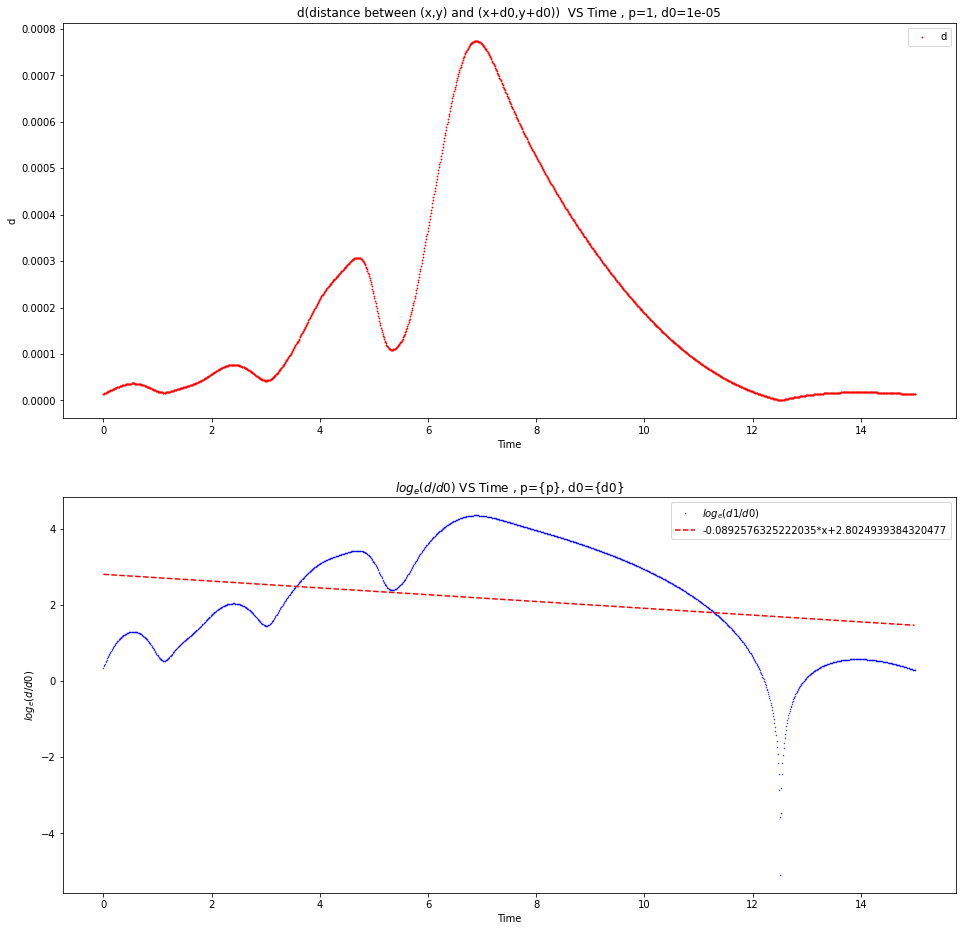

In [62]:
plt.figure(figsize=(16,16))

plt.subplot(2, 1, 1)
plt.plot(t1,d1,'ro',label="d",markersize=0.8)
plt.title(f"d(distance between (x,y) and (x+d0,y+d0))  VS Time , p={p}, d0={d0}")
plt.xlabel("Time")
plt.ylabel("d")
plt.legend()
#plt.show()

plt.subplot(2,1,2)

logd=[np.log(d/d0) for d in d1]
till=1500
model=np.polyfit(t1[:till],logd[:till],1)
predict=np.poly1d(model)

plt.plot(t1,logd,'b.',label="$log_{e}(d1/d0)$",markersize=0.8)
plt.plot(t1[:till],predict(t1[:till]),'r--',label=f"{model[0]}*x+{model[1]}")
plt.title("$log_{e}(d/d0)$ VS Time , p={p}, d0={d0}")
plt.xlabel("Time")
plt.ylabel("$log_{e}(d/d0)$")
plt.legend()
plt.savefig("lyapunov.png",dpi=1000)
plt.show()

In [29]:
model

array([ 0.36998685, -0.88444369])